In [125]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import warnings 
warnings.filterwarnings('ignore')
import os,joblib
print("libraries imported")

libraries imported


In [126]:
Data_file_path="https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv" 
df =pd.read_csv(Data_file_path)
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


# LOgistic regression

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [128]:
df.duplicated().sum()

np.int64(172)

In [129]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [130]:
df= df.dropna()


In [131]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [132]:
# male= df[df['Customer Type']==""]
# female=
# female 25 loyal
# 20 is unloyal

In [133]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [134]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [135]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [136]:
df['Class'].value_counts() 

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

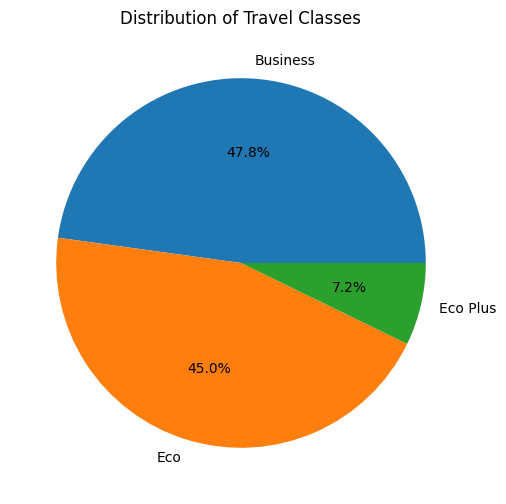

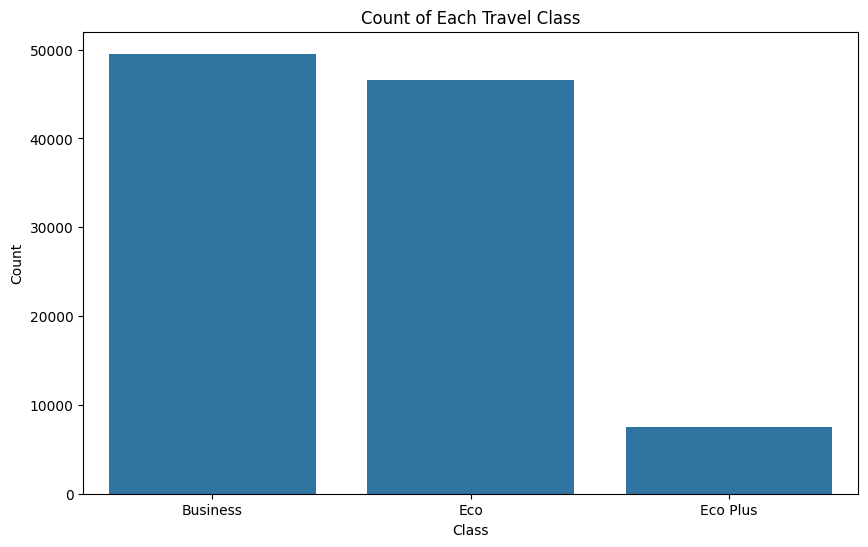

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the URL
Data_file_path = "https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df = pd.read_csv(Data_file_path)

# Drop rows with any missing values without using inplace
df = df.dropna()

# Get value counts for the 'Class' column
class_counts = df['Class'].value_counts()

# Pie Plot
plt.figure(figsize=(10, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Travel Classes')
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Count of Each Travel Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [138]:
travel=df['Type of Travel'].value_counts()
travel

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

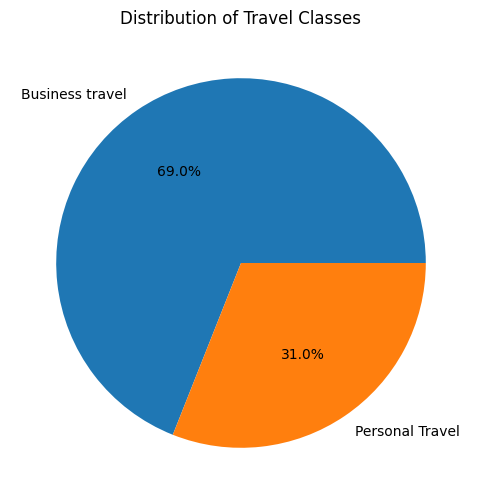

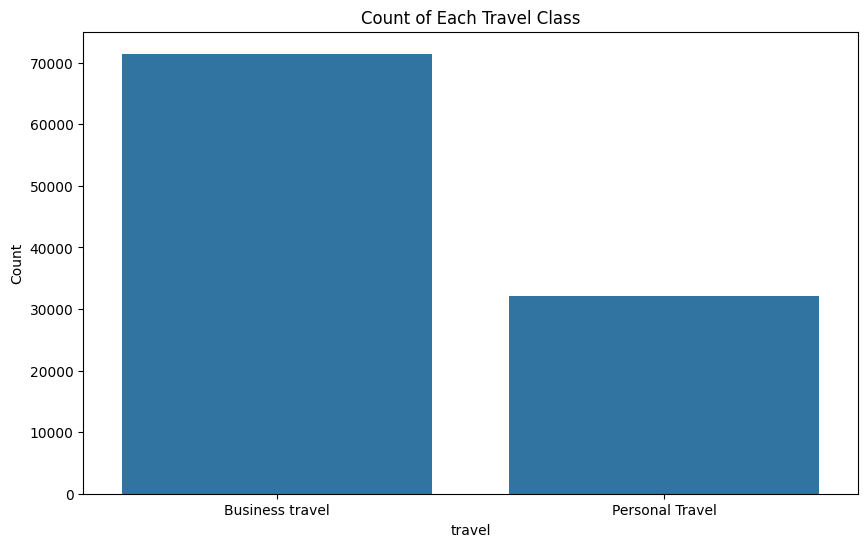

In [139]:


# Pie Plot
plt.figure(figsize=(10, 6))
plt.pie(travel, labels=travel.index, autopct='%1.1f%%')
plt.title('Distribution of Travel Classes')
plt.show()

# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=travel.index, y=travel.values)
plt.title('Count of Each Travel Class')
plt.xlabel('travel')
plt.ylabel('Count')
plt.show()


In [140]:
df 

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

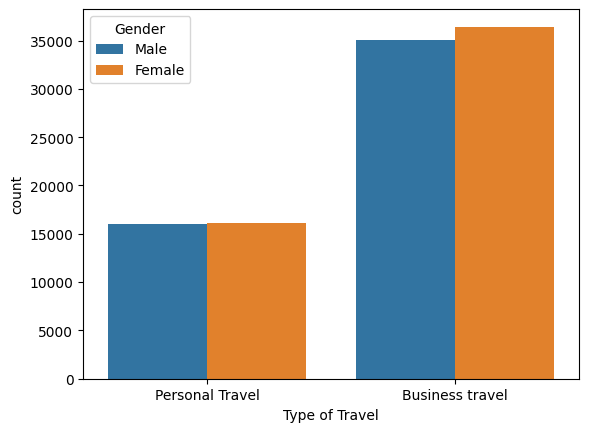

In [141]:
sns.countplot(x="Type of Travel",data=df,hue="Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

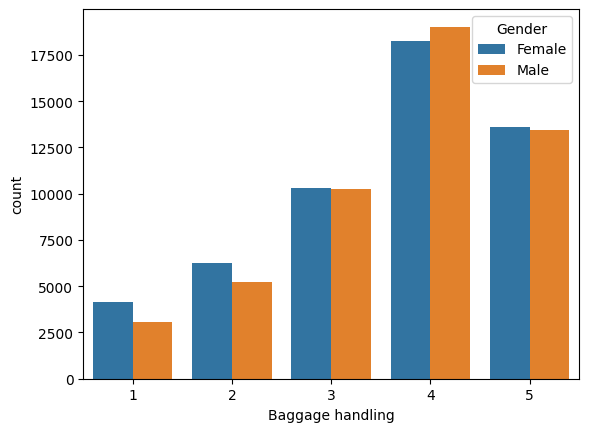

In [142]:
sns.countplot(x="Baggage handling",data=df,hue="Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

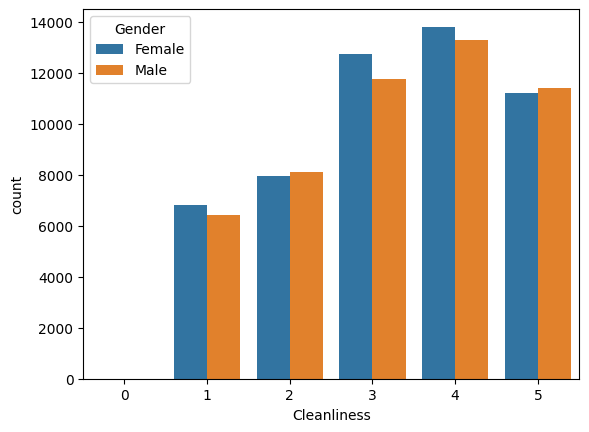

In [143]:
sns.countplot(x="Cleanliness",data=df,hue="Gender")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

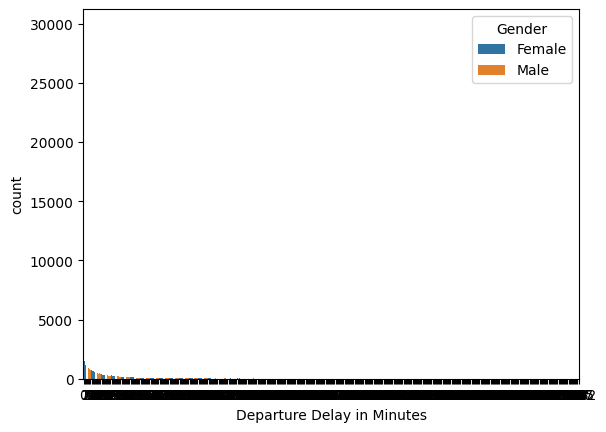

In [144]:
sns.countplot(x="Departure Delay in Minutes",data=df,hue="Gender")
plt.show

# one hot encoding -->
# label encoding-->
# from sklearn.preprocessing import oneHotEncoder , LabelEmncoder
# onehot encoding representation


In [145]:
df2=pd.get_dummies(df,drop_first='if_binary').astype(int)
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [146]:
#  split this dataset in x and y dataset
x=df2.drop('satisfaction_satisfied',axis='columns')
y=df2[['satisfaction_satisfied']]

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [149]:
# model or algorithm training 
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression() 

In [150]:
lgr.fit(x_train,y_train)

LogisticRegression()

In [151]:
print("training score: ",lgr.score(x_train,y_train)*100)
print("Testing score:",lgr.score(x_test,y_test)*100)

training score:  80.00482654600302
Testing score: 79.96524928809305


In [152]:
#  prediction
pred=lgr.predict(x_test)

In [153]:
y_test['prediction']=pred

In [154]:
y_test.head(40)

,satisfaction_satisfied,prediction
96350,1,1
4956,0,1
34532,0,0
79240,0,1
77511,0,0
54708,1,1
89187,1,1
39367,0,0
8262,0,0
67928,1,1


In [155]:
from sklearn.metrics import confusion_matrix,classification_report

In [156]:
from sklearn.metrics import confusion_matrix

In [157]:
confusion_matrix(ACTUAL_VALUE,PREDICTED_VALUE)
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])

NameError: name 'ACTUAL_VALUE' is not defined

In [ ]:
helloe gergnjjksbgksfjgsfjkgbsf